# Extrasolar Planets Mass Distribution Visualization

This notebook visualizes the distribution of masses of exoplanets discovered up to 2014 using histograms and box plots with professional styling.

## 1. Import Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)
print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore the Planets Dataset

In [8]:
# Load the planets dataset
df = pd.read_csv('C:\\Users\\Riya Rastogi\\OneDrive\\Desktop\\MachineLearning2026_Riya\\MachineLearning2026_Riya\\Dataset\\planets.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics for Mass:")
print(df['mass'].describe())

Dataset Shape: (1035, 6)

Column Names and Types:
method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

First few rows:
            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

Missing Values:
method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Summary Statistics for Mass:
count    513.000000
mean       2.638161
std        3.818617
min        0.003600
25%        0.229000
50%        1.260000
75%        3.040000
max       25.000000
Name: mass, dty

## 3. Prepare Data for Visualization

In [ ]:
# Remove rows with missing mass values
df_clean = df.dropna(subset=['mass'])

print(f"Original dataset size: {len(df)}")
print(f"After removing missing mass values: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

# Extract mass data
masses = df_clean['mass'].values

print(f"\nMass range: {masses.min():.4f} to {masses.max():.4f} Jupiter masses")
print(f"Mean mass: {masses.mean():.4f} Jupiter masses")
print(f"Median mass: {np.median(masses):.4f} Jupiter masses")

Original dataset size: 1035
After removing missing mass values: 513
Rows removed: 522

Mass range: 0.0036 to 25.0000 Jupiter masses
Mean mass: 2.6382 Jupiter masses
Median mass: 1.2600 Jupiter masses


## 4. Create a Histogram of Planet Masses

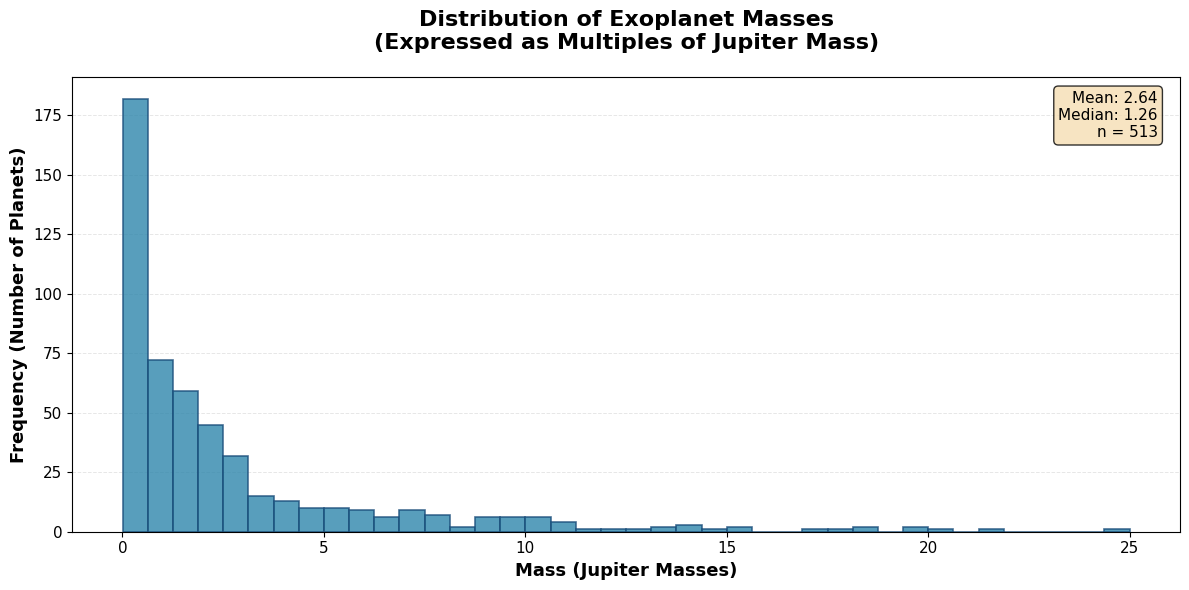

Histogram created and saved as 'histogram_planet_masses.png'


In [ ]:
# Create histogram with custom styling
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)

# Create histogram with 40 bins and custom colors
n, bins, patches = ax.hist(masses, bins=40, color='#2E86AB', edgecolor='#1A4D7A', alpha=0.8, linewidth=1.2)

# Customize the plot
ax.set_title('Distribution of Exoplanet Masses\n(Expressed as Multiples of Jupiter Mass)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Mass (Jupiter Masses)', fontsize=13, fontweight='bold')
ax.set_ylabel('Frequency (Number of Planets)', fontsize=13, fontweight='bold')

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Customize tick labels
ax.tick_params(labelsize=11)

# Add statistics text box
mean_mass = masses.mean()
median_mass = np.median(masses)
stats_text = f'Mean: {mean_mass:.2f}\nMedian: {median_mass:.2f}\nn = {len(masses)}'
ax.text(0.98, 0.97, stats_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('histogram_planet_masses.png', dpi=300, bbox_inches='tight')
plt.show()

print("Histogram created and saved as 'histogram_planet_masses.png'")

## 5. Create a Box Plot of Planet Masses

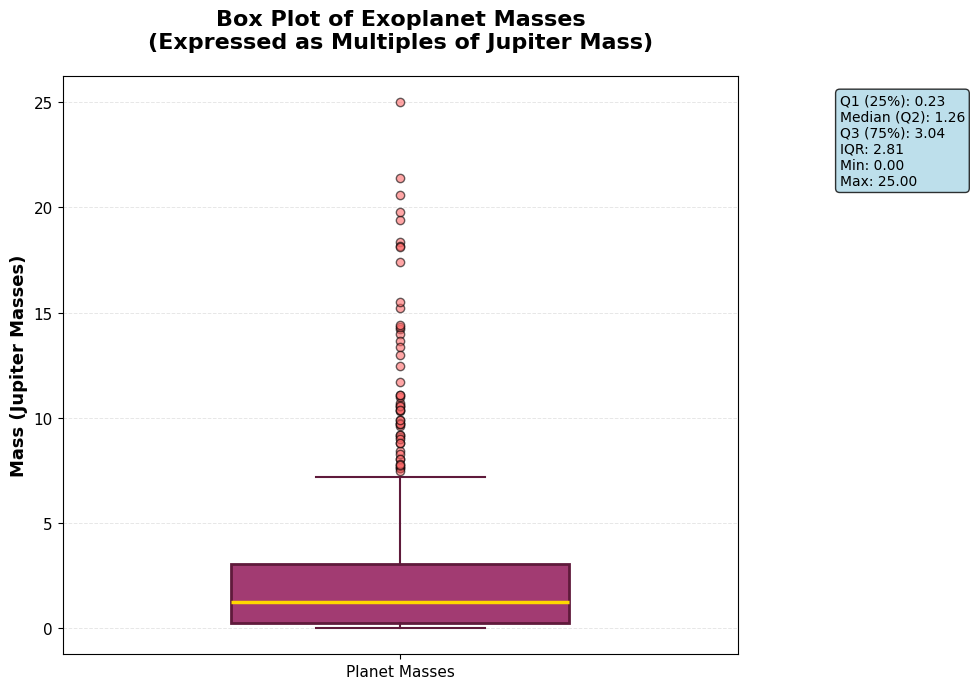

Box plot created and saved as 'boxplot_planet_masses.png'


In [ ]:
# Create box plot with custom styling
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Create box plot
bp = ax.boxplot(masses, vert=True, patch_artist=True, widths=0.5,
                 boxprops=dict(facecolor='#A23B72', color='#5F1A3B', linewidth=2),
                 whiskerprops=dict(color='#5F1A3B', linewidth=1.5),
                 capprops=dict(color='#5F1A3B', linewidth=1.5),
                 medianprops=dict(color='#FFD700', linewidth=2.5),
                 flierprops=dict(marker='o', markerfacecolor='#FF6B6B', markersize=6, alpha=0.6))

# Customize the plot
ax.set_title('Box Plot of Exoplanet Masses\n(Expressed as Multiples of Jupiter Mass)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Mass (Jupiter Masses)', fontsize=13, fontweight='bold')
ax.set_xticklabels(['Planet Masses'], fontsize=12)

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Customize tick labels
ax.tick_params(labelsize=11)

# Calculate and display quartile information
q1 = np.percentile(masses, 25)
q2 = np.percentile(masses, 50)  # Median
q3 = np.percentile(masses, 75)
iqr = q3 - q1

# Add statistics text box
stats_text = f'Q1 (25%): {q1:.2f}\nMedian (Q2): {q2:.2f}\nQ3 (75%): {q3:.2f}\nIQR: {iqr:.2f}\nMin: {masses.min():.2f}\nMax: {masses.max():.2f}'
ax.text(1.15, 0.97, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig('boxplot_planet_masses.png', dpi=300, bbox_inches='tight')
plt.show()

print("Box plot created and saved as 'boxplot_planet_masses.png'")

## 6. Side-by-Side Comparison: Histogram and Box Plot

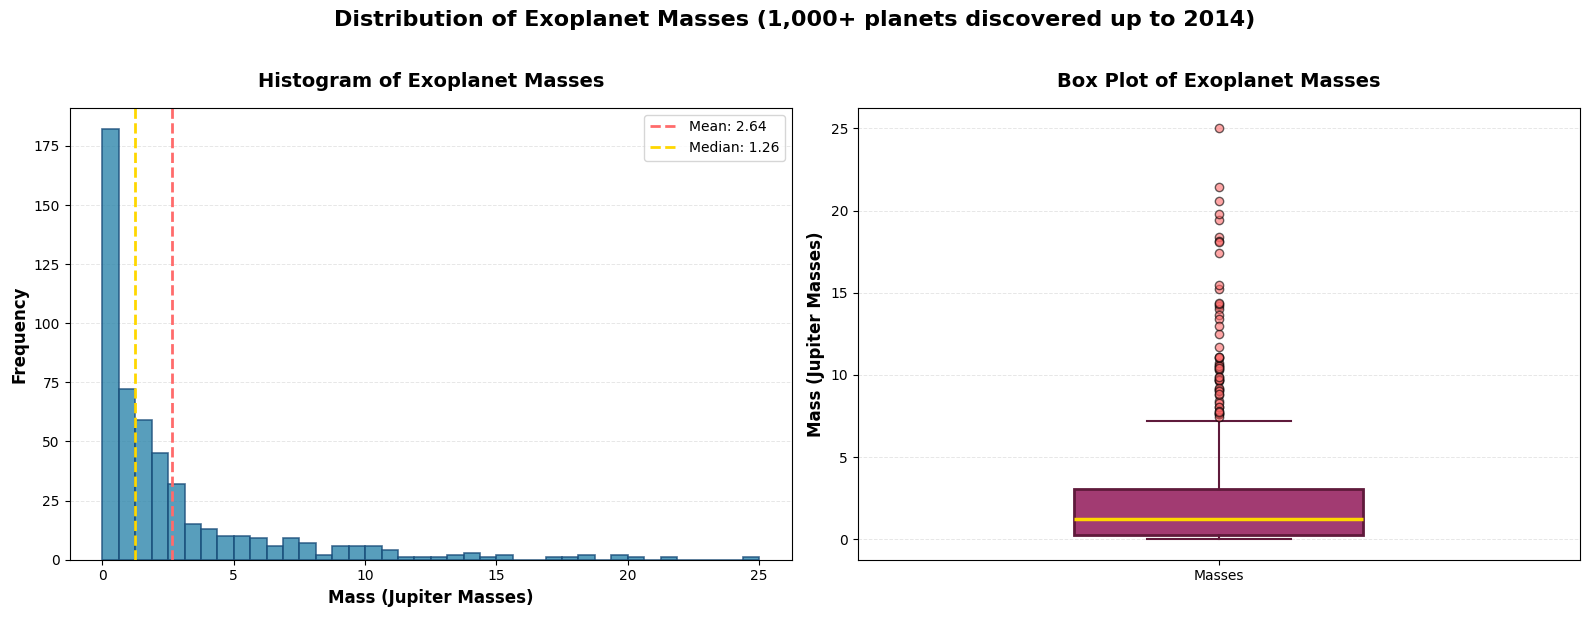

Combined visualization created and saved as 'combined_planet_masses_analysis.png'


In [ ]:
# Create a professional side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

# Left plot: Histogram
n, bins, patches = axes[0].hist(masses, bins=40, color='#2E86AB', edgecolor='#1A4D7A', 
                                alpha=0.8, linewidth=1.2)
axes[0].set_title('Histogram of Exoplanet Masses', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Mass (Jupiter Masses)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
axes[0].set_axisbelow(True)
axes[0].tick_params(labelsize=10)

# Add mean and median lines to histogram
mean_mass = masses.mean()
median_mass = np.median(masses)
axes[0].axvline(mean_mass, color='#FF6B6B', linestyle='--', linewidth=2, label=f'Mean: {mean_mass:.2f}')
axes[0].axvline(median_mass, color='#FFD700', linestyle='--', linewidth=2, label=f'Median: {median_mass:.2f}')
axes[0].legend(fontsize=10, loc='upper right')

# Right plot: Box plot
bp = axes[1].boxplot(masses, vert=True, patch_artist=True, widths=0.4,
                      boxprops=dict(facecolor='#A23B72', color='#5F1A3B', linewidth=2),
                      whiskerprops=dict(color='#5F1A3B', linewidth=1.5),
                      capprops=dict(color='#5F1A3B', linewidth=1.5),
                      medianprops=dict(color='#FFD700', linewidth=2.5),
                      flierprops=dict(marker='o', markerfacecolor='#FF6B6B', markersize=6, alpha=0.6))

axes[1].set_title('Box Plot of Exoplanet Masses', fontsize=14, fontweight='bold', pad=15)
axes[1].set_ylabel('Mass (Jupiter Masses)', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(['Masses'], fontsize=11)
axes[1].grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
axes[1].set_axisbelow(True)
axes[1].tick_params(labelsize=10)

# Add overall title
fig.suptitle('Distribution of Exoplanet Masses (1,000+ planets discovered up to 2014)', 
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('combined_planet_masses_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Combined visualization created and saved as 'combined_planet_masses_analysis.png'")

## 7. Summary Statistics and Key Insights

In [ ]:
# Display comprehensive statistics
print("=" * 70)
print("EXOPLANET MASS DISTRIBUTION ANALYSIS")
print("=" * 70)
print(f"\nSample Size: {len(masses)} planets with known mass measurements")
print(f"\nDescriptive Statistics:")
print(f"  Mean Mass:              {masses.mean():.4f} Jupiter masses")
print(f"  Median Mass:            {np.median(masses):.4f} Jupiter masses")
print(f"  Standard Deviation:     {masses.std():.4f} Jupiter masses")
print(f"  Minimum Mass:           {masses.min():.4f} Jupiter masses")
print(f"  Maximum Mass:           {masses.max():.4f} Jupiter masses")
print(f"  Range:                  {masses.max() - masses.min():.4f} Jupiter masses")

print(f"\nQuartile Information:")
q1 = np.percentile(masses, 25)
q2 = np.percentile(masses, 50)
q3 = np.percentile(masses, 75)
print(f"  Q1 (25th percentile):   {q1:.4f} Jupiter masses")
print(f"  Q2 (50th percentile):   {q2:.4f} Jupiter masses")
print(f"  Q3 (75th percentile):   {q3:.4f} Jupiter masses")
print(f"  IQR (Q3 - Q1):          {q3 - q1:.4f} Jupiter masses")

# Identify outliers using IQR method
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = masses[(masses < lower_bound) | (masses > upper_bound)]
print(f"\nOutlier Analysis (IQR method):")
print(f"  Lower Bound:            {lower_bound:.4f} Jupiter masses")
print(f"  Upper Bound:            {upper_bound:.4f} Jupiter masses")
print(f"  Number of Outliers:     {len(outliers)}")
print(f"  Percentage of Outliers: {(len(outliers) / len(masses) * 100):.2f}%")

print("\n" + "=" * 70)
print("KEY INSIGHTS:")
print("=" * 70)
print(f"• The distribution is heavily right-skewed with most planets having")
print(f"  masses much closer to the lower end.")
print(f"• The median ({np.median(masses):.2f}) is much smaller than the mean ({masses.mean():.2f}),")
print(f"  indicating the presence of some very massive planets.")
print(f"• Most planets are concentrated below {q3:.2f} Jupiter masses,")
print(f"  with the interquartile range spanning only {q3 - q1:.2f} Jupiter masses.")
print("=" * 70)

EXOPLANET MASS DISTRIBUTION ANALYSIS

Sample Size: 513 planets with known mass measurements

Descriptive Statistics:
  Mean Mass:              2.6382 Jupiter masses
  Median Mass:            1.2600 Jupiter masses
  Standard Deviation:     3.8149 Jupiter masses
  Minimum Mass:           0.0036 Jupiter masses
  Maximum Mass:           25.0000 Jupiter masses
  Range:                  24.9964 Jupiter masses

Quartile Information:
  Q1 (25th percentile):   0.2290 Jupiter masses
  Q2 (50th percentile):   1.2600 Jupiter masses
  Q3 (75th percentile):   3.0400 Jupiter masses
  IQR (Q3 - Q1):          2.8110 Jupiter masses

Outlier Analysis (IQR method):
  Lower Bound:            -3.9875 Jupiter masses
  Upper Bound:            7.2565 Jupiter masses
  Number of Outliers:     52
  Percentage of Outliers: 10.14%

KEY INSIGHTS:
• The distribution is heavily right-skewed with most planets having
  masses much closer to the lower end.
• The median (1.26) is much smaller than the mean (2.64),
  indic

# Extrasolar Planets Mass Distribution Visualization
This notebook visualizes the distribution of masses of exoplanet discovered up to 2014 using histograms and box plots.